In [1]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import sys
import glob


In [20]:
filename = '/home/spidey/Git/cinvestav-tesis/code/Unet/versions/train/dicom/dicom-001.dcm'
dataset = pydicom.dcmread(filename)

# Normal mode:
print()
print("Filename.........:", filename)
print("Storage type.....:", dataset.SOPClassUID)
print()

pat_name = dataset.PatientName
display_name = pat_name.family_name + ", " + pat_name.given_name
print("Patient's name...:", display_name)
print("Patient id.......:", dataset.PatientID)
print("Modality.........:", dataset.Modality)
print("Study Date.......:", dataset.StudyDate)

if 'PixelData' in dataset:
    rows = int(dataset.Rows)
    cols = int(dataset.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(dataset.PixelData)))
    if 'PixelSpacing' in dataset:
        print("Pixel spacing....:", dataset.PixelSpacing)

# use .get() if not sure the item exists, and want a default value if missing
print("Slice location...:", dataset.get('SliceLocation', "(missing)"))



Filename.........: /home/spidey/Git/cinvestav-tesis/code/Unet/versions/train/dicom/dicom-001.dcm
Storage type.....: 1.2.840.10008.5.1.4.1.1.2

Patient's name...: CASTILLO CAMPOS, MARIAL LUISA
Patient id.......: HUTA540620/30
Modality.........: CT
Study Date.......: 20191210
Image size.......: 512 x 512, 176690 bytes
Pixel spacing....: [0.9765625, 0.9765625]
Slice location...: 278.5


In [18]:
print('slice shape..........: ' + str(dataset.pixel_array.shape) )
print('slice data type......: ' + str(dataset.pixel_array.dtype) )
print('min and max in array.: ' + str(np.amin(dataset.pixel_array)) + ' - ' +  str(np.amax(dataset.pixel_array)))




slice shape..........: (512, 512)
slice data type......: uint16
min and max in array.: 0 - 2262


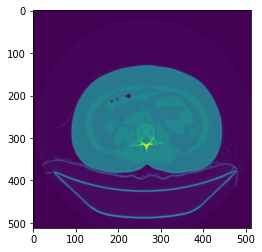

In [19]:
# plot the image using matplotlib
plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
plt.show()

# plot the image using matplotlib
plt.imshow(dataset.pixel_array)
plt.show()